<a href="https://colab.research.google.com/github/tangclaire95/tiktok_bot_detection/blob/main/tiktok_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub
import os
import pandas as pd

# Download dataset folder
path = kagglehub.dataset_download("manishkumar7432698/tiktok-profiles-data")
print("Dataset folder:", path)

# See what files are inside
print(os.listdir(path))

Using Colab cache for faster access to the 'tiktok-profiles-data' dataset.
Dataset folder: /kaggle/input/tiktok-profiles-data
['TikTok profiles dataset (Public web data).csv', '.nfs0000000016b7362400000312']


In [5]:
file_path = os.path.join(
    path,
    "TikTok profiles dataset (Public web data).csv"
)

tiktok = pd.read_csv(file_path)

# check heads
print(tiktok.head())

    timestamp      account_id              nickname  \
0  2023-08-01      a.r.m.y664                ❤️❤️❤️   
1  2023-08-01           a2_9r       ايمن الفستقي🍺🥂🥃   
2  2023-07-30     ti.po.check                   All   
3  2023-08-06  nutrifersanort  L.N Fernanda Sánchez   
4  2023-07-25          bhgdee                    D💲   

                                           biography  awg_engagement_rate  \
0  nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...             0.049630   
1                       حسابي الاصلي تيكتككك(_8_ytp_             0.059322   
2  Активный пользователь ТикТока 🌝\nМеня зовут BD...             0.001399   
3                 Nutrióloga, educadora en diabetes.             0.469767   
4  Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...             0.122283   

   comment_engagement_rate  like_engagement_rate bio_link  is_verified  \
0                 0.004473              0.045157      NaN        False   
1                 0.004358              0.054964      NaN 

Two tasks with this dataset:
1. surprisal analysis: `biography`
2. Find some relations in this dataset and make easy ML models.


In [6]:
tiktok = tiktok[
    [
        "awg_engagement_rate",
        "comment_engagement_rate",
        "like_engagement_rate",
        "followers",
        "following",
        "likes",
        "videos_count",
    ]
]

print(tiktok.head())

   awg_engagement_rate  comment_engagement_rate  like_engagement_rate  \
0             0.049630                 0.004473              0.045157   
1             0.059322                 0.004358              0.054964   
2             0.001399                 0.000058              0.001341   
3             0.469767                 0.004651              0.465116   
4             0.122283                 0.008152              0.114130   

   followers  following  likes  videos_count  
0       1755       1443   1586            20  
1        354       1422   3843           225  
2       1960        243  24000           228  
3         43         41    100             5  
4        276       2262    126             4  


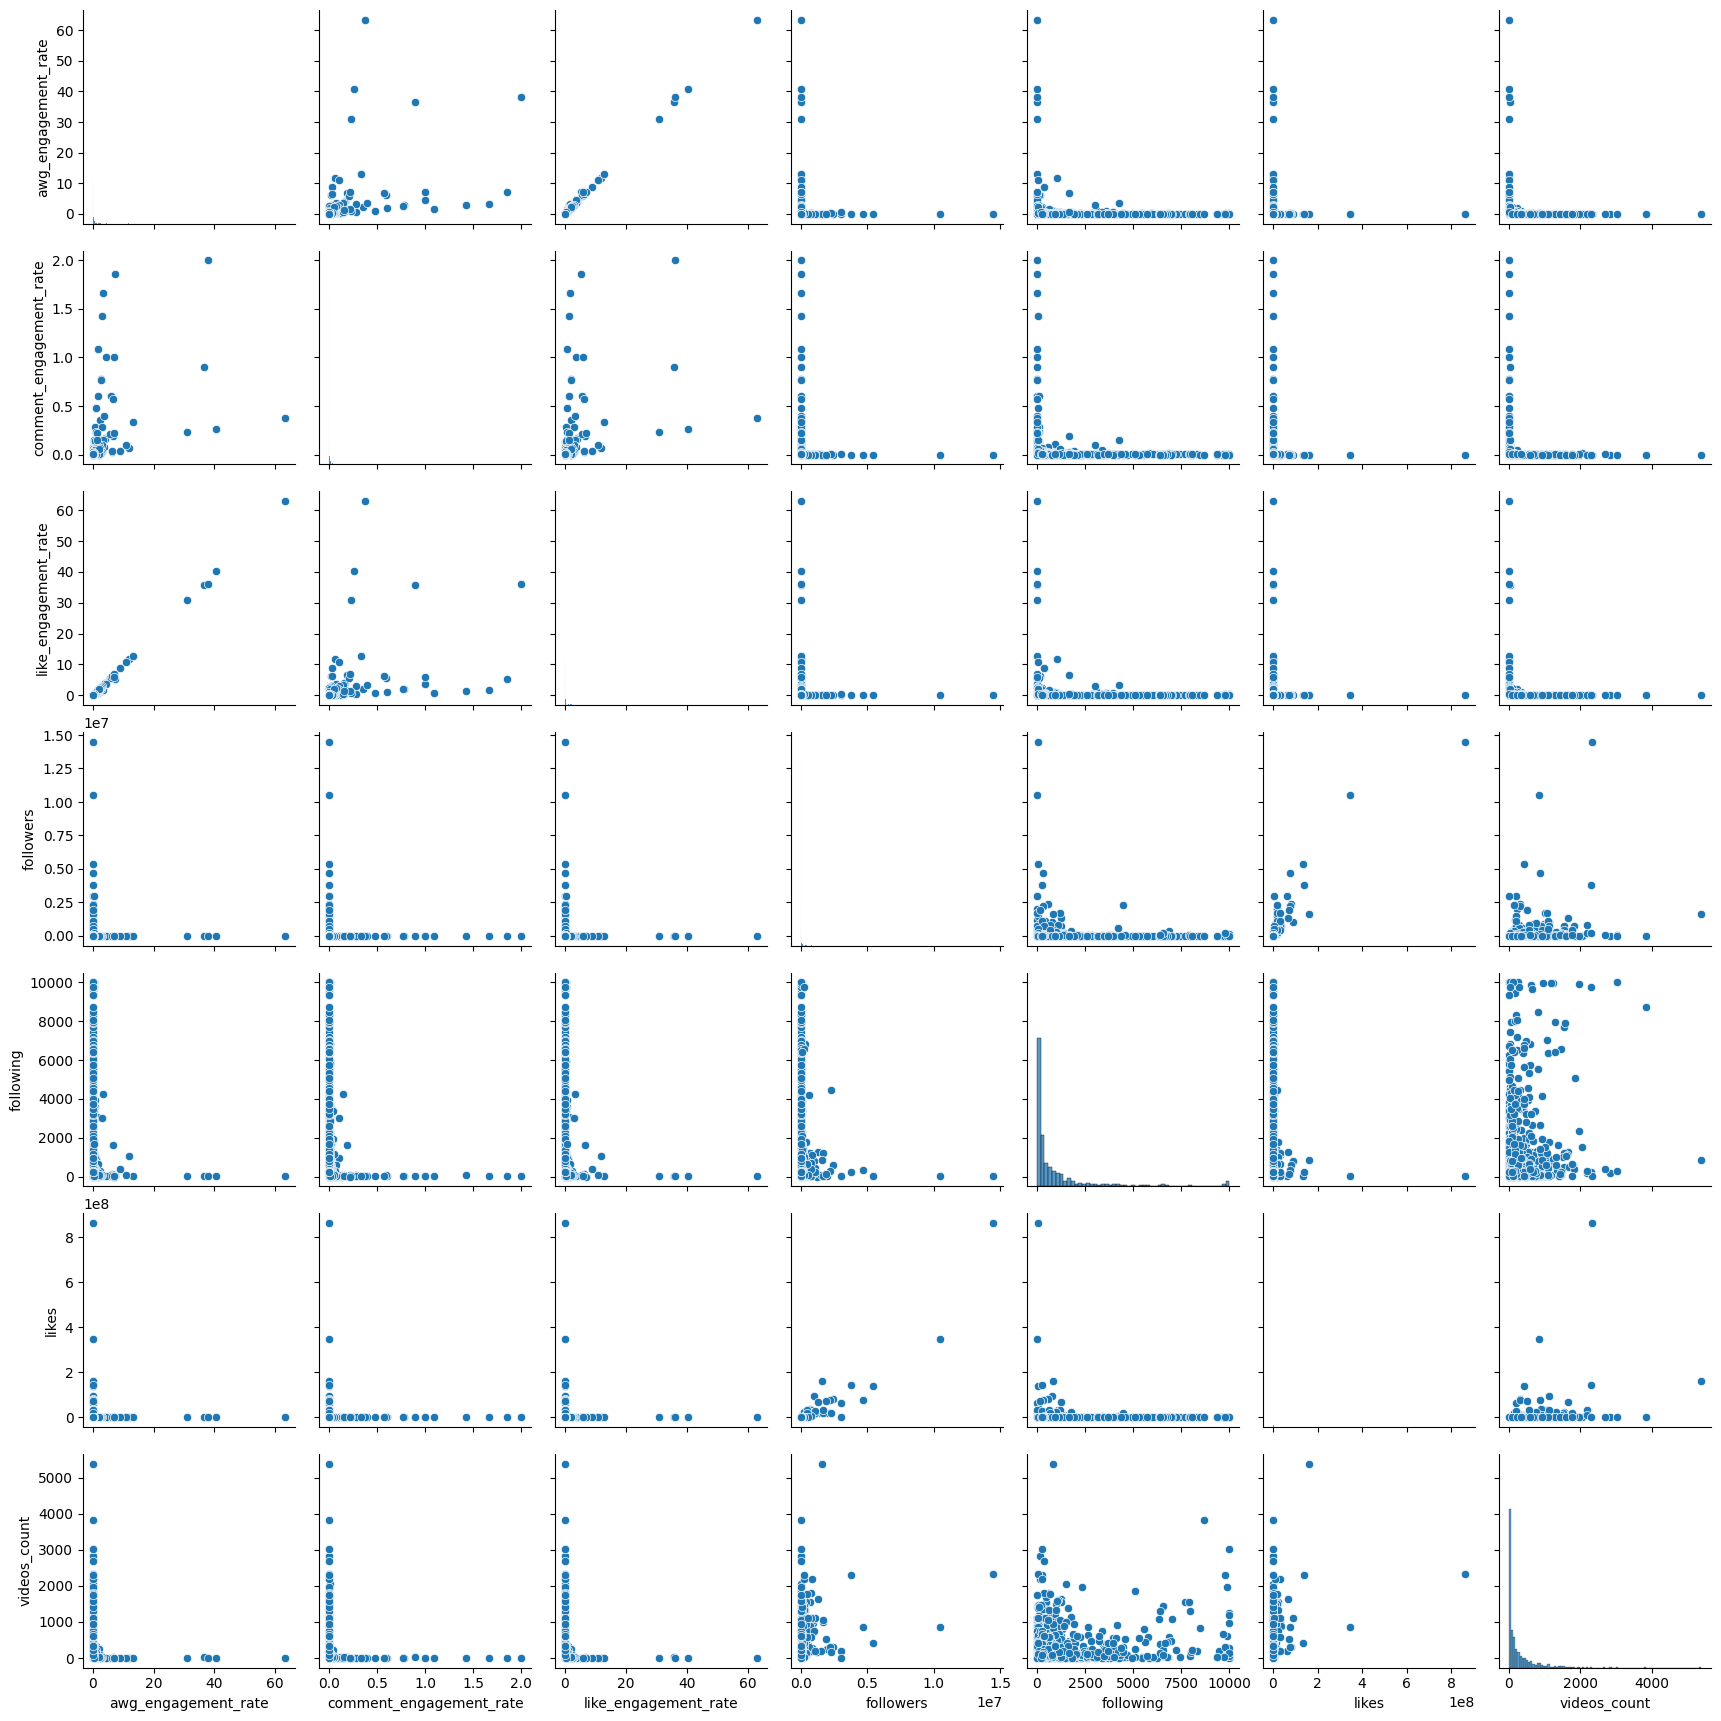

In [7]:
# check all relations by graphs

import matplotlib.pyplot as plt
import seaborn as sns

tk=pd.DataFrame(tiktok)
sns.pairplot(tk)
plt.show()

A linear relationship is found between `awg_engagement_rate` and `like_engagement_rate`.

So, I'd like to check the